<a href="https://colab.research.google.com/github/Rtniewi/advanced-data-ADVDS/blob/main/HW3/ADS_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

//***Katrina Cwiertniewicz
//*** CSC 792
//11/23/2025
//Project 3
#### **The purpose of this assignment is to analyze a heart disease dataset by using three different models: Logistic Regression, SGD Classifier, and Random Forest. This will include their confusion matrices and AUC scores to determine how well the models perform on testing data to predict whether a person has a presence or absence of heart disease based on specific features.**

**Import code found from:**
https://archive.ics.uci.edu/dataset/45/heart+disease

### **Import Dependencies**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from pandas.plotting import scatter_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# dataframe combining x and y
df = pd.concat([X, y], axis=1)

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

## **1. Plot distribution of age and sex for each target class.**

**All Ages in separate categories**

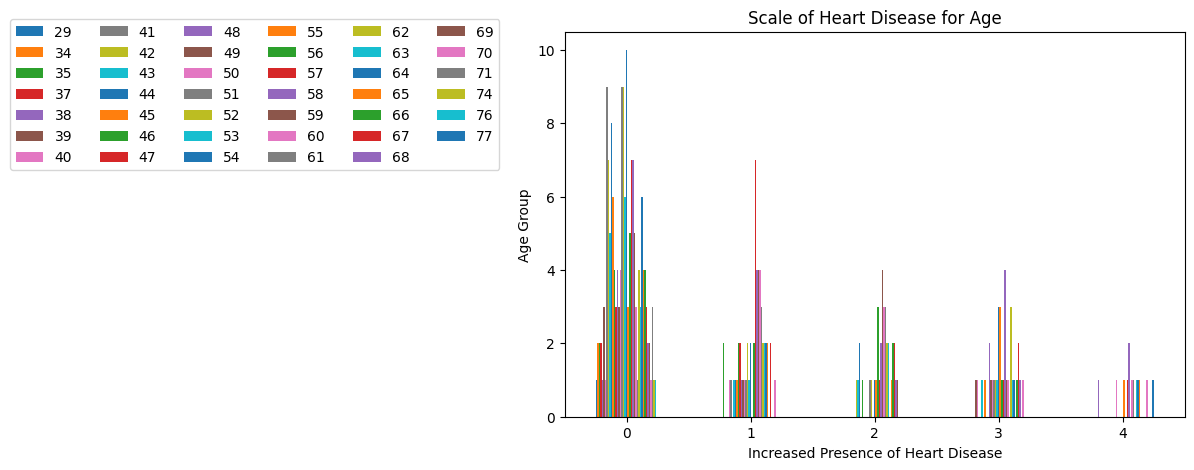

In [4]:
# Presence and Absence of Heart Disease regarding Age
fig1, ax1 = plt.subplots(figsize=(8,5))
ct1 = pd.crosstab(y['num'], X['age'])
ct1.plot.bar(ax = ax1)
plt.xticks(rotation=0)
plt.xlabel('Increased Presence of Heart Disease')
plt.ylabel('Age Group')
plt.title('Scale of Heart Disease for Age')
plt.legend(ncol=6, loc='upper center', bbox_to_anchor=(-0.5, 1.05))
plt.show()


**Ages binned to cateogories**

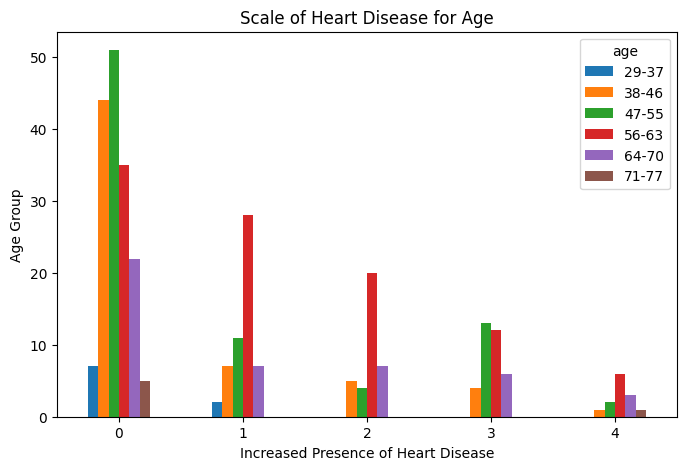

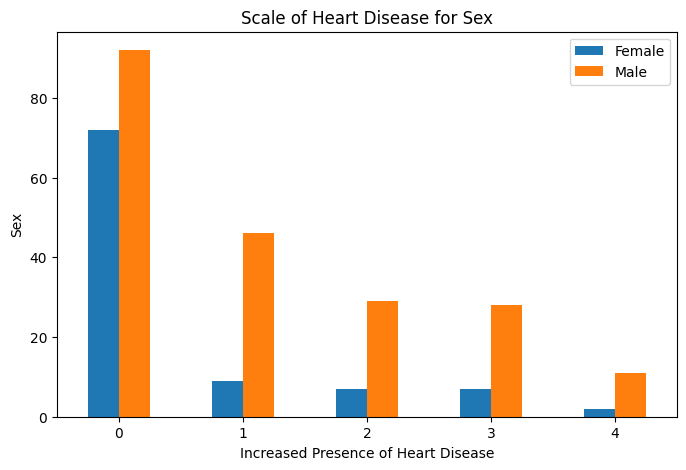

In [5]:
from matplotlib import legend
# Find out class distributions for age and sex for each target class

# Ages low to high ranged from 29-77
# Legend and bars were difficult to read so ages were binned to categories
bins = [29, 38, 47, 56, 64, 71, 78]
labels = ["29-37", "38-46", "47-55", "56-63", "64-70", "71-77"]

# Presence and Absence of Heart Disease regarding Age
fig1, ax1 = plt.subplots(figsize=(8,5))
heart_disease['age_group'] = pd.cut(X["age"], bins=bins, labels=labels, right=False)
ct1 = pd.crosstab(y['num'], heart_disease['age_group'])
ct1.plot.bar(ax = ax1)
plt.xticks(rotation=0)
plt.xlabel('Increased Presence of Heart Disease')
plt.ylabel('Age Group')
plt.title('Scale of Heart Disease for Age')

# Presence and Absence of Heart Disease regarding Sex
fig2, ax2 = plt.subplots(figsize=(8,5))
ct2 = pd.crosstab(y['num'], X['sex'])
ct2.plot.bar(ax = ax2)
plt.xticks(rotation=0)
plt.xlabel('Increased Presence of Heart Disease')
plt.ylabel('Sex')
plt.legend(['Female', 'Male'])
plt.title('Scale of Heart Disease for Sex')
plt.show()

## **Analysis of Chart Distributions**

**Age**

**Plot 1 was difficult to read as individual categories. Plot 2 shows binned ages.**


**From this study, it shows a majority of people across all ages have a 0 marker for no presence of heart disease when compared to other target classes. The age categories 47-55 and 56-63 were often the highest in most categories, meaning many participants of this study were in this age group.**


**However, this data may be skewed as the categories may be cut off at points where certain ages could have 0 cases. For example, the age range of 71-77 had 6 participants. This demographic could have more known cases of heart disease when compared to the 0 cases, but may not have been studied.**

In [6]:
#Count of Ages from 71-77
age_71_77 = X[(X['age'] >= 71)]
print(age_71_77.shape[0])
# 6 Aged 71-77

6


**Sex**

**Plot 3 shows there are many people included in this study with no presence of heart disease.**

**In all target classes, you would assume Male participants had more of a presence of heart disease than women. However, below shows the number of male and female participants. 97 females were included in this study, making up only 32% of the data. This is inconclusive as to whether Male or Female participants have an increased chance for heart disease when using only the distribution graph.**


In [7]:
# Count of Males in study
sex_M = X[(X['sex'] == 1)]
print(sex_M.shape[0])
# 206 Males

206


**303 participants are included in this study. This means 97 of them are female.**

## **2. Plot correlation values for all features with respect to the target class.**

In [8]:
corr_matrix = df.corr()
corr_matrix["num"].sort_values(ascending=False)

,num
num,1.000000
ca,0.518909
thal,0.509923
oldpeak,0.504092
cp,0.407075
exang,0.397057
slope,0.377957
sex,0.224469
age,0.222853
restecg,0.183696


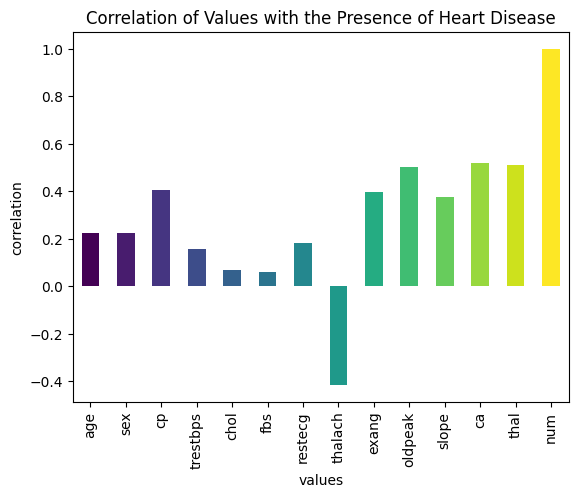

In [9]:
#Generate colors using a colormap found here: https://pythonguides.com/matplotlib-bar-chart-different-colors-python/
colors = plt.cm.viridis(np.linspace(0, 1, len(corr_matrix)))

corr_matrix["num"].plot(kind="bar",color=colors)
plt.xlabel("values")
plt.ylabel("correlation")
plt.title("Correlation of Values with the Presence of Heart Disease")
plt.show()


**Descriptions for most prominent correlation values in regard to the target.**

 * thalach: maximum heart rate achieved
 * oldpeak = ST depression induced by exercise relative to rest
 * ca: number of major vessels (0-3) colored by flourosopy
 * thal: 3 = normal; 6 = fixed defect; 7 = reversable defect






## **Correlation Plot Analysis**

**The plot above shows the correlation of values with respect to the target class: presence of heart disease.**

**'thalach has a negative correlation, meaning their values change in opposite directions. As the presence of heart disease increases, the lower a person's maximum heart rate decreases.**

**'oldpeak', 'ca', and 'thal' have the strongest correlation with the target at ~50%. Oldpeak indicates reduced blood flow to the heart muscle. CA represents calcium deposits, which can narrow the arteries and reduce blood flow. Thal represents Thalassemia, which is a blood disorder. Each of these values negatively affects the heart, which makes sense in regard to the correlation matrix.**



## **3. Check for any missing feature values and impute as necessary.**



Missing values include:
*   ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect



In [10]:
X.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


**I chose to use an imputer to fill the missing NaN values. This was because using a measure of central tendency (e.g, Mean) would not work well because the values are from specific ranges. Also, it would be more accurate for the data to choose a value based on other columns.**

In [11]:
missing_values = [
    'ca',
    'thal',
]

# Apply KNNImputer directly to the relevant columns using .loc
imputer = KNNImputer(n_neighbors=5)
X.loc[:, missing_values] = imputer.fit_transform(X[missing_values])

In [12]:
# Now, there are no missing values.
X.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


**A copy of the Unscaled DF with missing feature values imputed. For Step 7.**

In [13]:
unscaled_df = X.copy()

## **4. Use an 80-20 rule to train and test the following ML models:**

**StandardScale the Data**

In [14]:
# StandardScale the data
scaler = StandardScaler()
scaler.fit(X)

scaled_data = scaler.transform(X)

scaled_data

array([[ 0.94872647,  0.68620244, -2.25177456, ...,  2.27457861,
        -0.73139132,  0.65410017],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  0.64911323,
         2.46800574, -0.89994335],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  0.64911323,
         1.40154005,  1.17211467],
       ...,
       [ 0.28381332,  0.68620244,  0.87798549, ...,  0.64911323,
         0.33507437,  1.17211467],
       [ 0.28381332, -1.4572959 , -1.20852121, ...,  0.64911323,
         0.33507437, -0.89994335],
       [-1.82174501,  0.68620244, -0.16526786, ..., -0.97635214,
         0.76166064, -0.89994335]])

**Split the Dataset 80-20**

In [15]:
# Scaled Data and Heart Disease Target
#Assign num data 1,2,3,4 to 1 as presence of heart disease so binary values can be evaluated
#Reference code: https://www.geeksforgeeks.org/machine-learning/ml-logistic-regression-using-python/
X = scaled_data
y = (y > 0).astype(int)
# Split the dataset (303 instances) into the training set (80%) and testing (20%)
# random_state Controls the shuffling applied to the data before applying the split.
# Pass an int for reproducible output across multiple function calls.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## **Logistic Regression**

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 9 epochs took 0 seconds


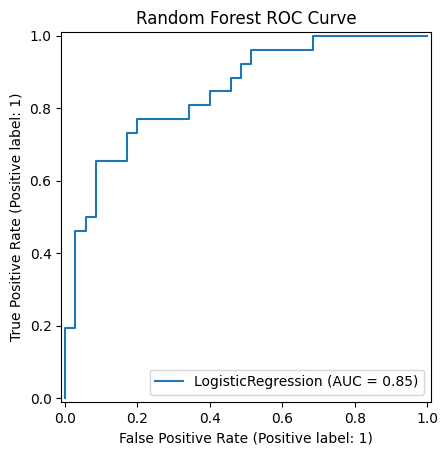

In [16]:
lr_classifier = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l1', #lasso regression
                        solver='saga',
                        max_iter=1000,
                        C=50,
                        verbose=2, # output progress
                        n_jobs=5, # parallelize over 5 processes
                        tol=0.01
                         )

# Fit the model
lr_classifier.fit(X_train, y_train)

# Let's see what the classifier has learned
lr_classifier.classes_


ax = plt.gca()
lr_disp = RocCurveDisplay.from_estimator(lr_classifier, X_test, y_test, ax=ax)

plt.title('Random Forest ROC Curve')
plt.show()

In [17]:
# Accuracy scores on the training and testing sets

score1 = round(lr_classifier.score(X_train, y_train), 2) # training score
score2 = round(lr_classifier.score(X_test, y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (score1, score2))

Training and Testing scores: 0.86, 0.79


### **Logistic Regression Confusion Matrix**

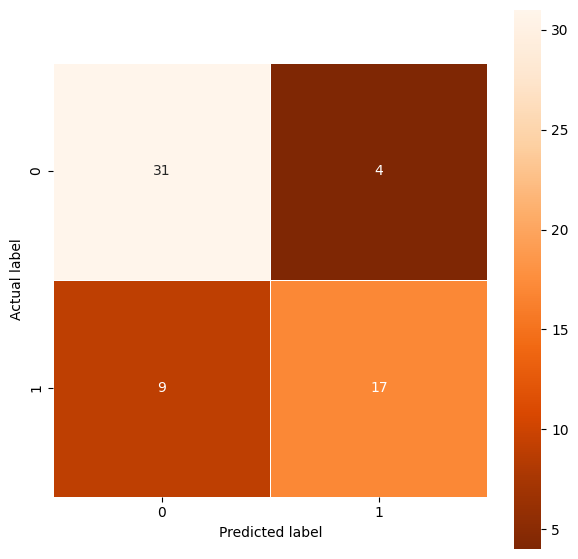

In [18]:
# The confusion matrix

lr_predictions = lr_classifier.predict(X_test)

labels = lr_classifier.classes_

# compute TP, TN, FP, FN values
lr_cm = confusion_matrix(y_true=y_test,
                      y_pred = lr_predictions,
                      labels = labels)

# compute recall, precision, f1-scores
lr_cr = classification_report(y_true=y_test,
                      y_pred = lr_predictions,
                      labels = labels)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(7,7))
sns.heatmap(lr_cm, annot=True,
            linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [19]:
# Print the classification report

print(lr_cr)

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        35
           1       0.81      0.65      0.72        26

    accuracy                           0.79        61
   macro avg       0.79      0.77      0.78        61
weighted avg       0.79      0.79      0.78        61



### **Logistic Regression Analysis**

**Logistic Regression Scores**


*   Precision: 79%
*   Recall: 79%
*   F1 Score: 78%


**Logistic Regression was highest in all three categories. This means it can predict better for correct positive predictions(Precision), correctly identify positive cases(recall), and has the best balance between precision and recall(F1 score). This model is still in the 80s, so it could be improved by choosing more relevant features or adding more data to specific age ranges.**




# **SGD Classifier**

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


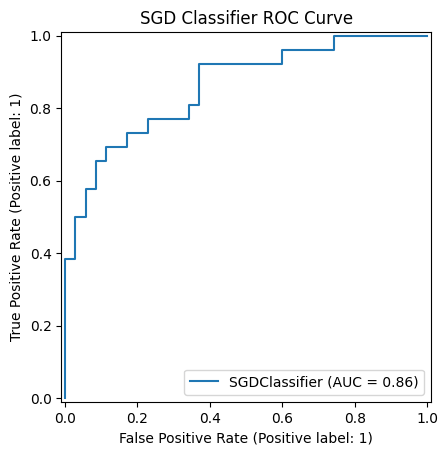

In [20]:
# Parallelize the job over 5 workers

sgd_classifier = SGDClassifier(max_iter=1000,
                        tol=1e-3,
                        random_state=42,
                        n_jobs=5, # parallelize over 5 workers
                        )

# Fit the model
sgd_classifier.fit(X_train, y_train)


ax = plt.gca()
sgd_disp = RocCurveDisplay.from_estimator(sgd_classifier, X_test, y_test, ax=ax)

plt.title('SGD Classifier ROC Curve')
plt.show()

In [21]:
# Accuracy scores on the training and testing sets

score3 = round(sgd_classifier.score(X_train, y_train), 2) # training score
score4 = round(sgd_classifier.score(X_test, y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (score3, score4))

Training and Testing scores: 0.83, 0.77


## **SGD Classifier Confusion Matrix**

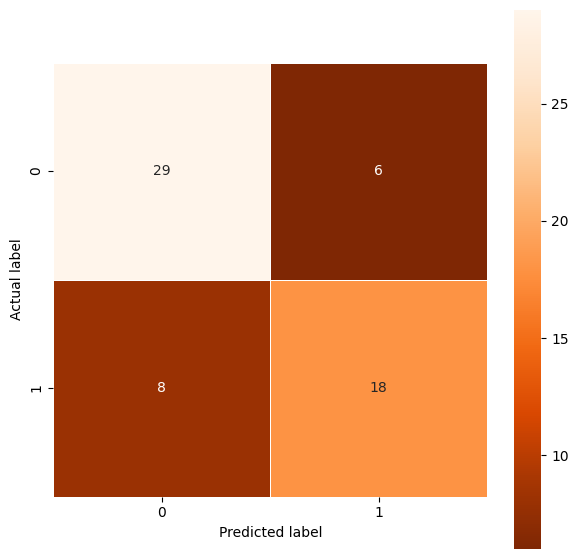

In [22]:
# The confusion matrix

sgd_predictions = sgd_classifier.predict(X_test)

labels = sgd_classifier.classes_

# compute TP, TN, FP, FN values
sgd_cm = confusion_matrix(y_true=y_test,
                      y_pred = sgd_predictions,
                      labels = labels)

# compute recall, precision, f1-scores
sgd_cr = classification_report(y_true=y_test,
                      y_pred = sgd_predictions,
                      labels = labels)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(7,7))
sns.heatmap(sgd_cm, annot=True,
            linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [23]:
print(sgd_cr)

              precision    recall  f1-score   support

           0       0.78      0.83      0.81        35
           1       0.75      0.69      0.72        26

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.76        61
weighted avg       0.77      0.77      0.77        61



### **SGD Classifier Analysis**

**SGD Classifier Scores**

*   Precision: 77%
*   Recall: 77%
*   F1 Score: 77%

**The SGA Classifier had the exact same percentages for all three scores. This model had a similar score to the Logistic Regression Model, but could still be improved by adjusting the learning rate.**

# **Random Forest**

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


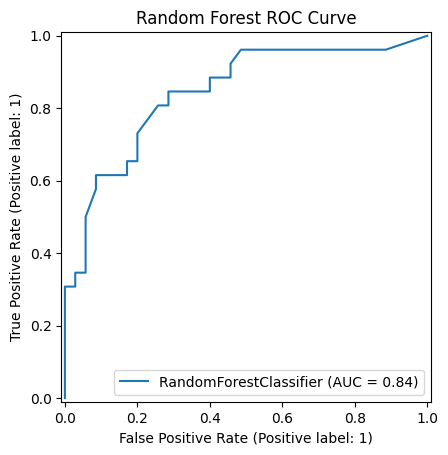

In [24]:
# Random Forest Classifier

rf_classifier = RandomForestClassifier(n_estimators=100,
                                       n_jobs=5)
rf_classifier.fit(X_train, y_train)

ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rf_classifier, X_test, y_test, ax=ax)

plt.title('Random Forest ROC Curve')
plt.show()

In [25]:
# Accuracy scores on the training and testing sets

score5 = round(rf_classifier.score(X_train, y_train), 2) # training score
score6 = round(rf_classifier.score(X_test, y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (score5, score6))

Training and Testing scores: 1.00, 0.77


### **Random Forest Confusion Matrix**

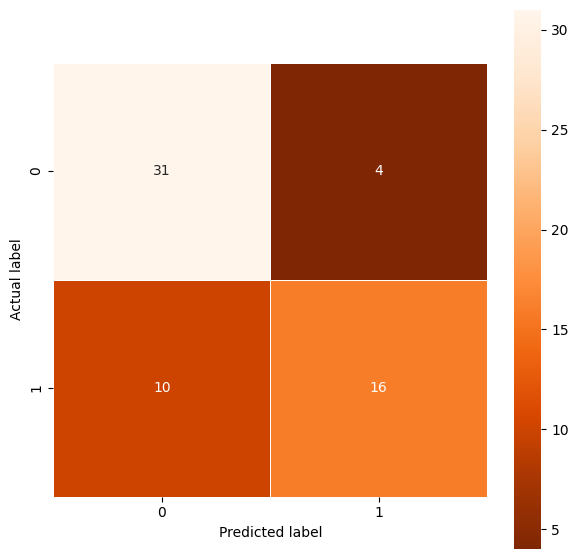

In [26]:
# The confusion matrix

rf_predictions = rf_classifier.predict(X_test)

labels = rf_classifier.classes_

# compute TP, TN, FP, FN values
rf_cm = confusion_matrix(y_true=y_test,
                      y_pred = rf_predictions,
                      labels = labels)

# compute recall, precision, f1-scores
rf_cr = classification_report(y_true=y_test,
                      y_pred = rf_predictions,
                      labels = labels)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(7,7))
sns.heatmap(rf_cm, annot=True,
            linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [27]:
# Print the classification report

print(rf_cr)

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        35
           1       0.80      0.62      0.70        26

    accuracy                           0.77        61
   macro avg       0.78      0.75      0.76        61
weighted avg       0.77      0.77      0.76        61



### **Random Forest Analysis**

**Random Forest Scores**

*   Precision: 77%
*   Recall: 77%
*   F1 Score: 76%

**The Random Forest model had the lowest score but was still very similar to the other two models. This model could be improved by adjusting hyperparameters such as the number of features or maximum depth.**





## **5. Display the confusion matrices and ROC curves for all 3 models**


## **Confusion Matrices**

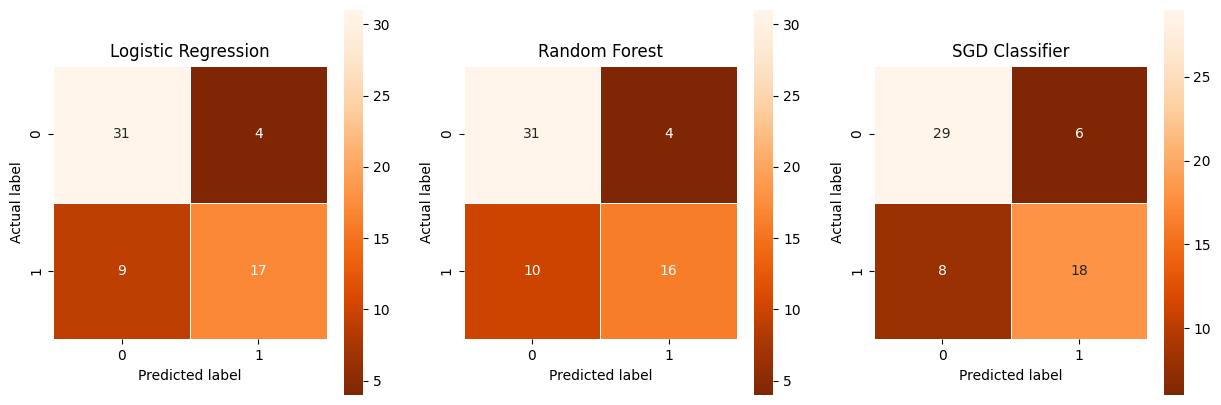

In [28]:
# Visualize the confusion matrix as a heatmap for all 3 models
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

#Logistic Regression
sns.heatmap(lr_cm, annot=True,
            linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g', ax=ax[0]);
ax[0].set_title('Logistic Regression')
ax[0].set_ylabel('Actual label')
ax[0].set_xlabel('Predicted label')

# Randon Forest
sns.heatmap(rf_cm, annot=True,
            linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g', ax=ax[1]);
ax[1].set_title('Random Forest')
ax[1].set_ylabel('Actual label')
ax[1].set_xlabel('Predicted label')

#SGD Classifier
sns.heatmap(sgd_cm, annot=True,
            linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g', ax=ax[2]);
ax[2].set_title('SGD Classifier')
ax[2].set_ylabel('Actual label')
ax[2].set_xlabel('Predicted label')
plt.show()

## **ROC Curves**

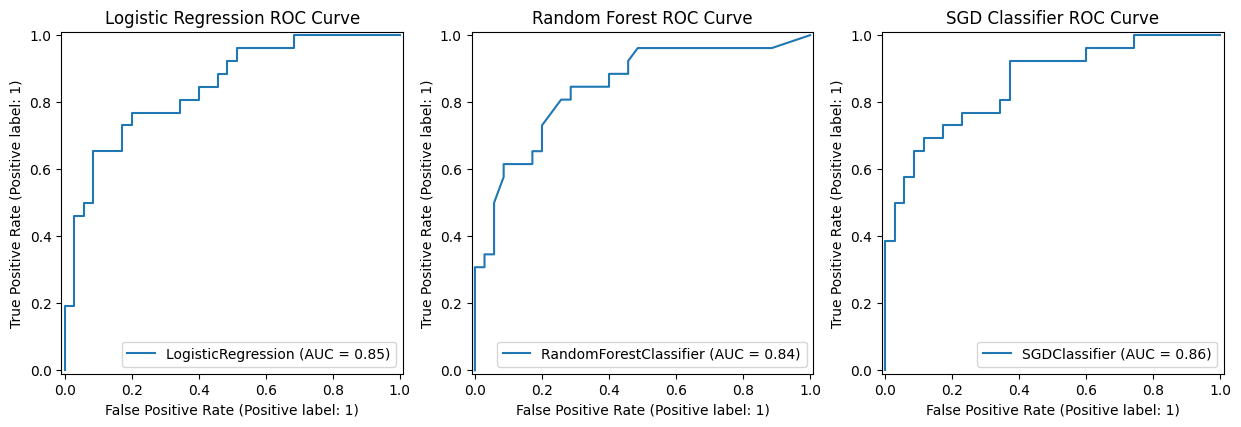

In [29]:
# Visualize the ROC curve for all 3 models
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

#Logistic Regression
lr_disp = RocCurveDisplay.from_estimator(lr_classifier, X_test, y_test, ax=ax[0])
ax[0].set_title('Logistic Regression ROC Curve')

# Randon Forest
rfc_disp = RocCurveDisplay.from_estimator(rf_classifier, X_test, y_test, ax=ax[1])
ax[1].set_title('Random Forest ROC Curve')


#SGD Classifier
sgd_disp = RocCurveDisplay.from_estimator(sgd_classifier, X_test, y_test, ax=ax[2])
ax[2].set_title('SGD Classifier ROC Curve')

plt.show()

### **ROC Curve Analysis**

**Random Forest has the highest AOC, which equals 88% as it has the most area under the curve. This means it can correctly classify observations the most. Logistic Regression is the least accurate, with 85% accuracy. All three ROC curves have similar AUCs in the high 80s, which represent fairly accurate classification of the data into categories. The closer to 1, the better, so all 3 models could still be improved. Additionally, these ROC curves are jagged, most likely because of the smaller dataset. If there were more available data, we should see a smoother line. This could result in a more or less accurate AUC depending on the accuracy of the model.**

**Source: 'https://www.geeksforgeeks.org/machine-learning/how-to-plot-roc-curve-in-python/'**

## **6. Plot the obtained training and testing accuracies for all 3 models in one graph (see Exercise 3).**


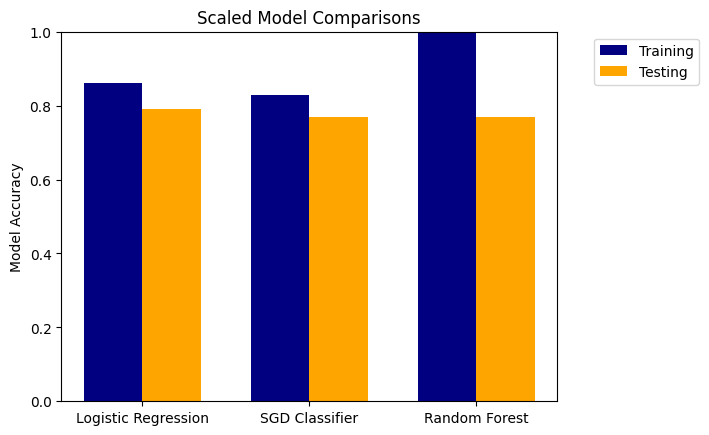

In [47]:
# Summarize the findings for all models

labels = ['Logistic Regression', 'SGD Classifier', 'Random Forest']
training_scores = [score1, score3, score5]
testing_scores =  [score2, score4, score6]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig1, ax1 = plt.subplots()
rects1 = ax1.bar(x - width/2, training_scores, width, label='Training', color='navy')
rects2 = ax1.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Model Accuracy')
ax1.set_xticks(x)
ax1.set_ylim(0,1)
ax1.set_xticklabels(labels)
ax1.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

plt.title('Scaled Model Comparisons')
plt.savefig('model_comparisons.png')
plt.show()

### **Scaled Model Analysis**



**All three models had around the same Testing score of 80% with the Logistic Regression Model being the highest. The Logistic Regression Model and the SGD Classifier's Training and Testing scores were very similar. Showing that the data was able to predict a model similar to the Training when not given the labels to identify unseen data. Random Forest has the most contrasting Testing and Training Scores. Training with a score of 100% and Testing around 80% This score shows the model is overfitting the data and needs to be trained differently to improve this gap. This could be fixed by changing hyperparameters such as how the branches split or pruning the tree differently using a depth limit.**


## **7. Verify whether or not scaling the data helps improve model accuracies.**

**Create new assignment for X as Unscaled Code**

In [31]:
X = unscaled_df
y = (y > 0).astype(int)
# Split the dataset (303 instances) into the training set (80%) and testing (20%)
# random_state Controls the shuffling applied to the data before applying the split.
# Pass an int for reproducible output across multiple function calls.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### **Logistic Regression**

In [32]:
lr_classifier = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l1', #lasso regression
                        solver='saga',
                        max_iter=1000,
                        C=50,
                        verbose=2, # output progress
                        n_jobs=5, # parallelize over 5 processes
                        tol=0.01
                         )

# Fit the model
lr_classifier.fit(X_train, y_train)

# Let's see what the classifier has learned
lr_classifier.classes_

convergence after 89 epochs took 0 seconds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


array([0, 1])

In [33]:
# Accuracy scores on the training and testing sets

score1_unscaled = round(lr_classifier.score(X_train, y_train), 2) # training score
score2_unscaled = round(lr_classifier.score(X_test, y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (score1, score2))

Training and Testing scores: 0.86, 0.79


### **SGD Classifier**

In [34]:
# Parallelize the job over 5 workers

sgd_classifier = SGDClassifier(max_iter=1000,
                        tol=1e-3,
                        random_state=42,
                        n_jobs=5, # parallelize over 5 workers
                        )

# Fit the model
sgd_classifier.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(n_jobs=5, random_state=42)

In [35]:
# Accuracy scores on the training and testing sets

score3_unscaled = round(sgd_classifier.score(X_train, y_train), 2) # training score
score4_unscaled = round(sgd_classifier.score(X_test, y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (score3, score4))

Training and Testing scores: 0.83, 0.77


### **Random Forest**

In [36]:
# Random Forest Classifier

rf_classifier = RandomForestClassifier(n_estimators=100,
                                       n_jobs=5)
rf_classifier.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_jobs=5)

In [37]:
# Accuracy scores on the training and testing sets

score5_unscaled = round(rf_classifier.score(X_train, y_train), 2) # training score
score6_unscaled = round(rf_classifier.score(X_test, y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (score5, score6))

Training and Testing scores: 1.00, 0.77


### **Model Accuracies using Unscaled Data**

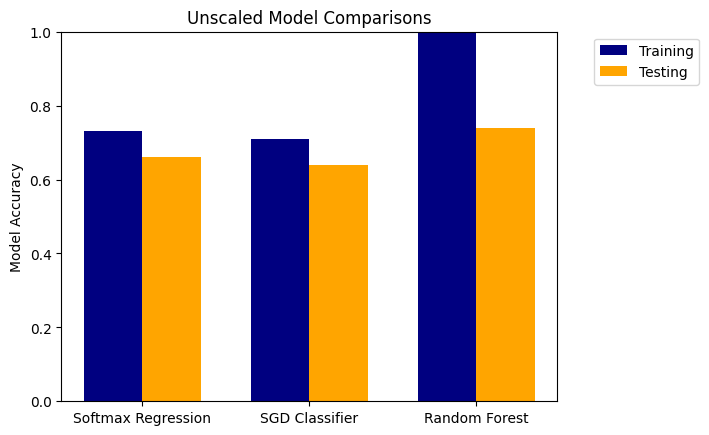

<Figure size 640x480 with 0 Axes>

In [38]:
# Summarize the findings for all models

labels = ['Softmax Regression', 'SGD Classifier', 'Random Forest']
training_scores = [score1_unscaled, score3_unscaled, score5_unscaled]
testing_scores =  [score2_unscaled, score4_unscaled, score6_unscaled]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig2, ax2 = plt.subplots()
rects1_unscaled = ax2.bar(x - width/2, training_scores, width, label='Training', color='navy')
rects2_unscaled = ax2.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Model Accuracy')
ax2.set_xticks(x)
ax2.set_ylim(0,1)
ax2.set_xticklabels(labels)
ax2.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

plt.title('Unscaled Model Comparisons')
plt.show()
plt.savefig('model_comparisons_unscaled.png')

## **Model Accuracies: Scaled vs Unscaled Data**

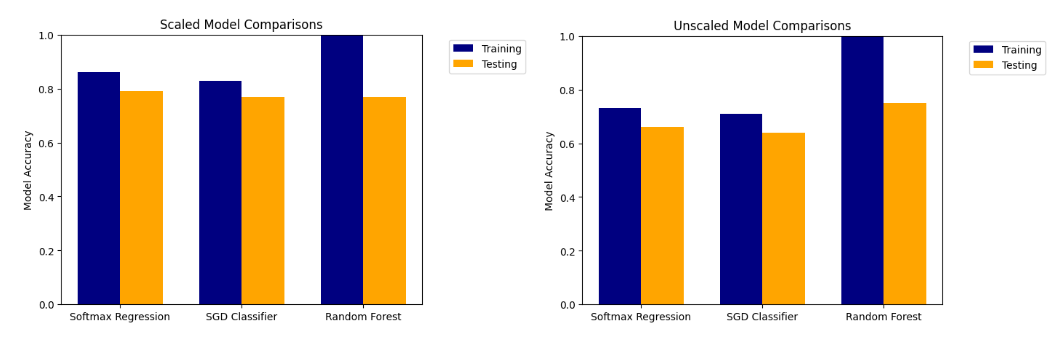

### **Scaled vs Unscaled Data Analysis**

**Comparing the graphs, we see there is an improvement when using scaled data. As much as 10% for each model. This shows that scaling the data emphasizes features that could get lost when more prevalent features exist. By scaling the data, the features that also contribute to whether a person has heart disease can better predict the correct label.**


## **8. Summarize your findings.**

**When comparing the score, the one that should be improved would be the Recall score for the 1 labels. Each of these scores was ~10 points lower than the 0 label Recall score:**


**Recall 1 Label Score**


*   Logisitc Regression = 65%
*   SGD Classifier = 69%
*   Random Forest = 62%


**This was the biggest gap between label scores for all three models.**


In [45]:
# Number of cases where there is an absence of Heart Disease
target_1 = df[df['num'] == 0]
print(target_1.shape[0])

164


**There are 139 cases that have a binary label of 1 (0 = 164 cases from the code above). Meaning that 46% of the data students the presence of heart disease. To improve this, adding more cases of the 1 label may improve this score to correctly identify positive cases.**

**Overall, these three models were able to identify true positives and true negatives a majority of the time in comparison with false positives and false negatives. Most scores for each model were from 60 to 70%. That percentage would have to be higher for it to be a reliable model for a real-world scenario. This could be done by increasing the dataframe size and adding more ages to all ranges to get a better understanding of trends.**
